In [4]:
import tensorflow as tf

In [2]:
from keras.models import Sequential

In [3]:
# disable Certificate issue on Mac
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [27]:
pip install tensorflow --trusted-host=pypi.org --trusted-host=files.pythonhosted.org

     |████████████████████████████████| 207.1 MB 11.0 MB/s eta 0:00:01    |████▏                           | 26.8 MB 5.9 MB/s eta 0:00:31
     |████████████████████████████████| 1.3 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 20.0 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.8 MB/s eta 0:00:011
     |████████████████████████████████| 42 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 463 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 158 kB/s eta 0:00:01
     |████████████████████████████████| 781 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.

Note: you may need to restart the kernel to use updated packages.


In [5]:
a = tf.constant(5)
print(a)

tf.Tensor(5, shape=(), dtype=int32)


In [6]:
b = tf.constant(10)
c = tf.add(a,b)
print(c)

tf.Tensor(15, shape=(), dtype=int32)


In [7]:
var1 = tf.Variable(20)
print(var1)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=20>


In [8]:
var1 = tf.Variable([[1,2],[2,3]])
var2 = tf.Variable([[5,6],[7,8]])
res = tf.matmul(var2,var1)
print(res)

tf.Tensor(
[[17 28]
 [23 38]], shape=(2, 2), dtype=int32)


In [9]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data() 

In [10]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
import matplotlib.pyplot as plt

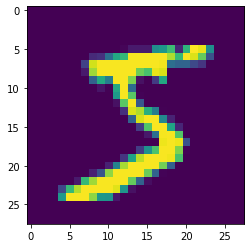

5


In [12]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [13]:
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.4230 - accuracy: 0.8844
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1541 - accuracy: 0.9555
Epoch 3/10
118/118 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.9697
Epoch 4/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0776 - accuracy: 0.9775
Epoch 5/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0596 - accuracy: 0.9826
Epoch 6/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.9865
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 8/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0312 - accuracy: 0.9910
Epoch 9/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0229 - accuracy: 0.9940
Epoch 10/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0193 - accuracy: 0.9949

In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0712 - accuracy: 0.9786


[0.07123836874961853, 0.978600025177002]

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [59]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Input

In [60]:
input = Input(shape=(784,))
hidden_1 = Dense(256,activation='relu')(input)
hidden_2 = Dense(256,activation='relu')(hidden_1)
hidden_3 = Dense(256,activation='relu')(input)
concat = Concatenate()([hidden_2,hidden_3])
output = Dense(10,activation='softmax')(concat)
model = Model(inputs=[input],outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 256)          65792       ['dense_3[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                              

In [61]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
model.fit(x_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 1s 6ms/step - loss: 0.3895 - accuracy: 0.8906
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1461 - accuracy: 0.9576
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0978 - accuracy: 0.9711
Epoch 4/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0700 - accuracy: 0.9792
Epoch 5/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0522 - accuracy: 0.9847
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0392 - accuracy: 0.9888
Epoch 7/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0313 - accuracy: 0.9911
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0252 - accuracy: 0.9929
Epoch 9/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0179 - accuracy: 0.9956
Epoch 10/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0163 - accuracy: 0.9957

In [63]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0655 - accuracy: 0.9796


[0.06554841250181198, 0.9796000123023987]

# Custom Layers

In [64]:
from tensorflow.keras import layers

In [79]:
class MyLayer(layers.Layer):
    def __init__(self,units,input_dim,activation):
        super(MyLayer,self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value = w_init(shape=(input_dim,units),dtype='float32'),trainable=True)
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(units,),dtype='float32'),trainable=True)
        self.activation = activation
    def call(self,inputs):
        linear_op = tf.add(tf.matmul(inputs,self.w),self.b)
        if self.activation == 'relu':
            return tf.nn.relu(linear_op)
        elif self.activation == 'softmax':
            return tf.nn.softmax(linear_op)

In [83]:
class MyModel(tf.keras.Model):
    def __init__(self,n_input,n_hidden1,n_hidden2,n_classes):
        super(MyModel,self).__init__()
        self.layer1 = MyLayer(n_hidden1,n_input,'relu')
        self.layer2 = MyLayer(n_hidden2,n_hidden1,'relu')
        self.out_layer = MyLayer(n_classes,n_hidden2,activation='softmax')
        
    def call(self,inputs):
        x = self.layer1(inputs)
        x = self.layer2(x)
        return self.out_layer(x)

In [84]:
model = MyModel(784,256,256,10)

In [85]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.fit(x_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.4973 - accuracy: 0.8687
Epoch 2/10
118/118 [==============================] - 1s 4ms/step - loss: 0.1799 - accuracy: 0.9478
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1241 - accuracy: 0.9631
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0930 - accuracy: 0.9724
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0709 - accuracy: 0.9791
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0573 - accuracy: 0.9832
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0453 - accuracy: 0.9866
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9886
Epoch 9/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.9913
Epoch 10/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9927

In [88]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9795


[0.06593641638755798, 0.9794999957084656]

In [90]:
predictions = model.predict(x_test)
print(predictions)

[[2.24602505e-08 1.38136782e-08 2.64465683e-07 ... 9.99994397e-01
  7.54075842e-08 8.57407372e-07]
 [4.83842744e-09 2.18263776e-05 9.99976158e-01 ... 2.30027334e-11
  1.16395951e-08 8.11079922e-14]
 [3.20017512e-06 9.97543097e-01 1.02881786e-04 ... 1.90171925e-03
  7.33988563e-05 1.10944018e-06]
 ...
 [6.62769319e-13 3.53451088e-11 4.61055185e-13 ... 1.98759935e-07
  2.87630453e-08 2.09714744e-06]
 [5.49716349e-11 3.14750581e-09 1.12341386e-11 ... 3.91586452e-09
  4.83663962e-06 6.63063007e-11]
 [1.62121261e-09 9.45425856e-12 6.49377357e-11 ... 4.72479586e-14
  9.65200576e-12 1.32365690e-13]]
